<h3><center>M5 Practical Challenge: Classification Model Performance Metrics
    <br>By Anna Imhoff and Randy Leon</br></h3></center>

<b>1) Load the provided M5_Data.csv file to your DAV 6150 Github Repository.<b><br>
<b>2) Read the data set from your Github repository and load it into a Pandas data frame.<b>

In [ ]:
#Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from numpy import trapz
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

#Read in the csv from Github
df = pd.read_csv("https://raw.githubusercontent.com/annaimhoff/DAV-6150/main/M5_Data.csv", sep=',')
                 
#View the data frame to ensure that the desired columns were selected
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [ ]:
#Drop columns 0 to 7
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,class,scored.class,scored.probability
0,0,0,0.328452
1,0,0,0.273190
2,1,0,0.109660
3,0,0,0.055998
4,0,0,0.100491


<b>3) Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data. 

  Do the rows represent the actual or the predicted classification? What about the columns?

  When observing the value_counts(), determine whether the rows or columns in the crosstab() output sum to the respective value_counts() figures.<b>

In [ ]:
#Use the crosstab function to calculate the contents of the confusion matrix
cross = pd.crosstab(df['class'], df['scored.class'])
cross

scored.class,0,1
class,,
0,119,5
1,30,27


In [ ]:
#Use value counts to make sure we understand the output of the confusion matrix
df['class'].value_counts()

0    124
1     57
Name: class, dtype: int64

In [ ]:
#Use value counts to make sure we understand the output of the confusion matrix
df['scored.class'].value_counts()

0    149
1     32
Name: scored.class, dtype: int64

Using the crosstab and value_counts functions, we can see that:

- A total of 124 (0) values in the 'class' row, **119** of which were guessed *correctly* in the column 'scored.class' and **5** guessed *incorrectly*.

- A total of 57 (1) values in the 'class' row, **30** of which were guessed *incorrectly* and **27** of them guessed *correctly*.

- ***Rows*** represent value counts in 'class', the actual classifications, and ***columns*** represent value counts in 'scored.class' which are the predicted classifications.

<b>4) Extract the individual confusion matrix values, saving them for later use.</b>

In [ ]:
tn=cross.at[0, 0]
fn=cross.at[1, 0]
tp=cross.at[1, 1]
fp=cross.at[0, 1]

#View the individual values, true negative, false negative, true positive, and false positive.
print(tn)
print(fn)
print(tp)
print(fp)

119
30
27
5


<b> 5) Write a Python function that calculates and returns the *accuracy* metric.</b>

In [ ]:
def acc_function():

  df3 = pd.crosstab(df['class'], df['scored.class'], margins=True)
  true_neg=df3.at[0, 0]
  true_pos=df3.at[1, 1]
  total_classified=df3.iat[2, 2]
  print(((true_neg)+(true_pos))/(total_classified))
  return
  
acc_function()

0.8066298342541437


<b> 6) Write a Python function that calculates and returns the *precision* metric.</b>

In [ ]:
def prec_function():

  df3 = pd.crosstab(df['class'], df['scored.class'], margins=True)
  true_pos=df3.at[1, 1]
  false_pos=df3.at[0, 1]
  print((true_pos)/((true_pos)+(false_pos)))
  return
  
prec_function()

0.84375


<b> 7) Write a Python function that calculates and returns the *sensitivity* metric.</b>

In [ ]:
def sens_function():

  df3 = pd.crosstab(df['class'], df['scored.class'], margins=True)
  false_neg=df3.at[1, 0]
  true_pos=df3.at[1, 1]
  print((true_pos)/((true_pos)+(false_neg)))
  return
  
sens_function()

0.47368421052631576


<b> 8) Write a Python function that calculates and returns the *specificity* metric.</b>

In [ ]:
def spec_function():

  df3 = pd.crosstab(df['class'], df['scored.class'], margins=True)
  true_neg=df3.at[0, 0]
  false_pos=df3.at[0, 1]
  print((true_neg)/((true_neg)+(false_pos)))
  return
  
spec_function()

0.9596774193548387


<b> 9) Write a Python function that calculates and returns the *F1 Score* metric.</b>

In [ ]:
def F1_function():

  df3 = pd.crosstab(df['class'], df['scored.class'], margins=True)

  true_neg=df3.at[0, 0]
  false_neg=df3.at[1, 0]
  true_pos=df3.at[1, 1]
  false_pos=df3.at[0, 1]

  precision = (true_pos)/((true_pos)+(false_pos))
  recall = (true_pos)/((true_pos)+(false_neg))
  print(2*(precision*recall)/(precision+recall))

  return

F1_function()

0.6067415730337079


<b>10) Write a Python function to plot a *ROC curve* and calculate the *AUC*</b>.

In [ ]:
#Source: https://www.youtube.com/watch?v=afQ_DyKMxUo

#Make our thresholds all numbers between 0.00 - 1.04 with an interval of 0.01
thresholds = list(np.array(list(range(0, 105, 1)))/100)

#Make list of coordinates with x's as true positive rates and y's as false positive rates
roc_point = []

#Function to iterate through our df increasing each variable by one, for each threshold in our range
#Finding true positives, false positives, false negatives, and true negatives.
for threshold in thresholds:
    
    tp = 0; fp = 0; fn = 0; tn = 0

    for index, instance in df.iterrows():
        actual = instance['class']
        prediction = instance['scored.probability']

        if prediction >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0
        
        if prediction_class == 1 and actual == 1:
            tp = tp + 1
        elif actual == 1 and prediction_class == 0:
            fn = fn + 1
        elif actual == 0 and prediction_class == 1:
            fp = fp + 1
        elif actual == 0 and prediction_class == 0:
            tn = tn + 1

#True positive rate or sensitvity
#False positive rate or (1 - specificity)
    tpr = tp /(tp + fn)
    fpr = fp /(tn + fp)

#Adding to the list of coordinates, tpr and fpr
    roc_point.append([tpr, fpr])

In [ ]:
#Data frame that shows tprs, fprs and thresholds
pivot = pd.DataFrame(roc_point, columns = ["x", "y"])
pivot['threshold'] = thresholds

#View pivot
pivot.head(10)

,x,y,threshold
0,1.0,1.000000,0.00
1,1.0,1.000000,0.01
2,1.0,1.000000,0.02
3,1.0,0.975806,0.03
4,1.0,0.967742,0.04
5,1.0,0.951613,0.05
6,1.0,0.903226,0.06
7,1.0,0.846774,0.07
8,1.0,0.822581,0.08
9,1.0,0.774194,0.09


Text(0, 0.5, 'true positive rate')

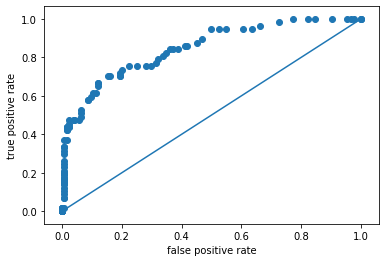

In [ ]:
#Plot the ROC Curve
plt.scatter(pivot.y, pivot.x)
plt.plot([0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [ ]:
#Calculate the AUC using the trapz function
auc = round(abs(np.trapz(pivot.x, pivot.y)), 4)
auc

0.8489

<b>11) Apply the Python functions you’ve created to the relevant columns of the provided data set to produce the classification metrics specified in steps 5 through 9 of this assignment.<b>

In [ ]:
print("accuracy"), acc_function()
print("precision"), prec_function()
print("sensitivity"), sens_function()
print("specificity"), spec_function()
print("F1"), F1_function()

accuracy
0.8066298342541437
precision
0.84375
sensitivity
0.47368421052631576
specificity
0.9596774193548387
F1
0.6067415730337079


(None, None)

<b> 12) Now compare the output of your functions against the output of the pre-built functions available within the *scikit-learn* library. 

Specifically, apply the confusion_matrix(), accuracy_score(),  precision_score(), recall_score()(remember: recall = sensitivity), f1_score(), and the metrics.classification_report() functions to the relevant columns of the provided data set. 

Discuss how well the results of these pre-built functions compare to those of the functions you’ve created for this assignment.<b>

In [ ]:
#Use confusion_matrix() from scikit-learn
from sklearn.metrics import confusion_matrix
y_test = df['class']
y_pred = df['scored.class']
confusion_matrix(y_test, y_pred)

array([[119,   5],
       [ 30,  27]], dtype=int64)

In [ ]:
#Compare to crosstab from question 3
cross

scored.class,0,1
class,,
0,119,5
1,30,27


Identical results when compared to our crosstab function.

In [ ]:
#Use accuracy_score() from scikit-learn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8066298342541437

In [ ]:
#Compare to accuracy function from question 5
acc_function()

0.8066298342541437


In [ ]:
#Use precision_score() from scikit-learn
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.84375

In [ ]:
#Compare to precision function from question 6
prec_function()

0.84375


In [ ]:
#Use recall_score() from scikit-learn
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.47368421052631576

In [ ]:
#Compare to sensitivity function from question 7
sens_function()

0.47368421052631576


In [ ]:
#Use f1_score() from scikit-learn
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6067415730337079

In [ ]:
#Compare to F1 score function from question 9
F1_function()

0.6067415730337079


In [ ]:
#Use metrics.classification_report() from scikit-learn
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



We saw identical results when using the functions we created to calculate the crosstab, accuracy, precision, sensitivity (recall), and F1 score, as compared to using the pre-built functions in the scikit-learn package.

<b> 13) Using the metrics.plot_roc_curve () and metrics.auc() functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set. <b>

In [ ]:
#Source: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#Assign x and y values for the curve
y = df.iloc[:,0].values
X = df.iloc[:,2].values

In [ ]:
#Split the data set into training and test with a test size containing 33% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12) 

In [ ]:
#Use LogisticRegression model from scikit-learn
clf = LogisticRegression()
clf.fit(X_train.reshape(-1,1), y_train)
y_pred = clf.predict(X_test.reshape(-1,1))

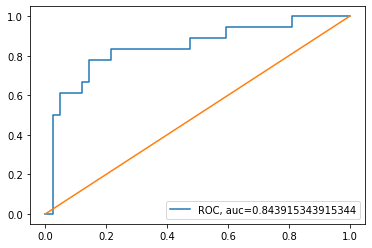

In [ ]:
#Plot
#Show AUC score on the graph
y_pred_proba = clf.predict_proba(X_test.reshape(-1,1))[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1])
plt.show()

In [ ]:
#Use roc_auc_score() from scikit-learn to calculate the AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.843915343915344

Text(0, 0.5, 'true positive rate')

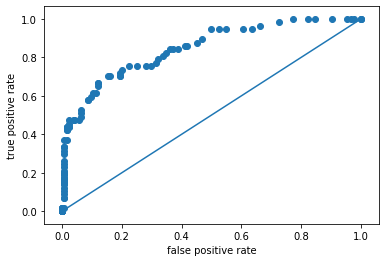

In [ ]:
#Compare to ROC Curve from question 10
plt.scatter(pivot.y, pivot.x)
plt.plot([0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

Using the scikit-learn package produces a more rigid looking graph with an AUC of 0.8439. 
Using matplotlib, the ROC curve shows each point which made a smoother looking graph with an AUC of 0.8489.  These AUC values are very close to each other but not identical like we saw with the other values from above.